In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [6]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scale=sc.fit_transform(training_set)

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scale[i-60:i,0])
    y_train.append(training_set_scale[i,0])
#Converting to numpy array
X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train.shape)

#Reshaping
#X_train.shape[0]: Number of samples.
#X_train.shape[1]: Number of time steps (60).
X_train=X_train.reshape(1198,60,1)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

#


(1198, 60)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout



In [9]:
model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.2))

C:\Users\molvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.add(Dense(units=1))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - loss: 0.1514
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0080
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0047
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0042
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0040
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0040
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0047
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0043
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s

In [14]:
test_data=pd.read_csv('Google_Stock_Price_Test.csv')
test_data.shape

(20, 6)

In [15]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [16]:
real_stock_price=test_data.iloc[:,1:2].values
print(real_stock_price.shape)

(20, 1)


In [ ]:
#little unsure on this block
#getting the predicted stock price 

#concatenating the training and test data
dataset_total=pd.concat((dataset_train['Open'],test_data['Open']),axis=0)

#stock prices of previous 60 days for the first day of test data
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values

#reshaping
inputs=inputs.reshape(-1,1)

#scaling
inputs=sc.transform(inputs)

#creating the test data
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=X_test.reshape(20,60,1)

#predicting the stock prices
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


In [18]:
print(predicted_stock_price[0],real_stock_price[0])

[767.75323] [778.81]


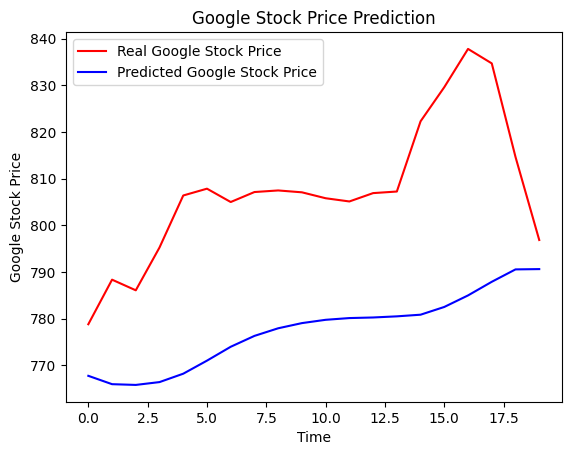

In [19]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()